# 🛢️ Projeto Sprint 10 — Previsão de Reservas de Petróleo com Aprendizado de Máquina

## 🎯 Objetivo do Projeto

A empresa **OilyGiant** deseja encontrar as melhores regiões para desenvolver novos poços de petróleo. Para isso, é necessário:

- Prever a quantidade de reservas (em milhares de barris) com base em características de poços nas regiões.
- Estimar o lucro potencial dos poços com maior volume previsto.
- Avaliar os riscos financeiros usando **técnicas de bootstrapping**.
- Indicar **a região com maior retorno e menor risco** para investimento.

---

## 🗂️ Índice do Projeto

1. [Importação e Preparação dos Dados](#1)
2. [Treinamento dos Modelos por Região](#2)
3. [Funções para Treinamento e Previsão](#3)
4. [Cálculo de Lucro Potencial por Região](#4)
5. [Análise de Risco com Bootstrapping](#5)
6. [Conclusões e Recomendação Final](#6)

---

## ❓ Perguntas a serem Respondidas

1. Qual o volume médio previsto de reservas em cada região?
2. Qual o RMSE (erro quadrático médio) do modelo em cada região?
3. Qual o lucro estimado ao investir nos 200 melhores poços de cada região?
4. Qual o risco de prejuízo (perda financeira) estimado usando bootstrapping?
5. Qual região apresenta **melhor relação entre lucro e risco**, sendo ideal para investimento?

---



## 1. 📁 Importação e Análise Inicial dos Dados

Nesta etapa, faremos:

- A leitura dos três arquivos CSV contendo os dados geológicos de cada região
- Uma verificação da estrutura dos dados: colunas, tipos e valores ausentes
- Uma análise exploratória visual com:
  - Histograma da variável `product` (volume de reservas)
  - Matriz de correlação das features
- Criação de uma função reutilizável para importar e analisar qualquer dataset de poços de petróleo


In [1]:
# 📦 Bibliotecas principais para o projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🔧 Ferramentas de modelagem e avaliação
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


In [6]:
def carregar_e_analisar(nome_arquivo, titulo_regiao):
    """
    Lê o arquivo CSV de uma região de petróleo e exibe análise inicial:
    - Head do DataFrame
    - Checagem de valores ausentes e duplicados
    - Histograma do target (product)
    - Heatmap de correlação
    """
    df = pd.read_csv(nome_arquivo)
    
    print(f'📄 {titulo_regiao} - Visualização Inicial:')
    print(df.head(), '\n')
    
    print('🔎 Verificação de valores ausentes:')
    print(df.isna().sum(), '\n')

    # Verificação de duplicatas
    num_duplicadas = df.duplicated().sum()
    print(f'📌 Linhas duplicadas: {num_duplicadas}')
    
    print('📊 Estatísticas gerais:')
    print(df.describe(), '\n')
    
    # Histograma do target
    plt.figure(figsize=(8, 4))
    sns.histplot(df['product'], bins=50, kde=True)
    plt.title(f'{titulo_regiao} - Distribuição do Volume de Reservas (product)')
    plt.xlabel('Milhares de Barris')
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()

    # Heatmap de correlação
    plt.figure(figsize=(6, 4))
    sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title(f'{titulo_regiao} - Correlação entre Variáveis')
    plt.show()
    
    return df


📄 Região 0 - Visualização Inicial:
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647 

🔎 Verificação de valores ausentes:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64 

📌 Linhas duplicadas: 0
📊 Estatísticas gerais:
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.70064

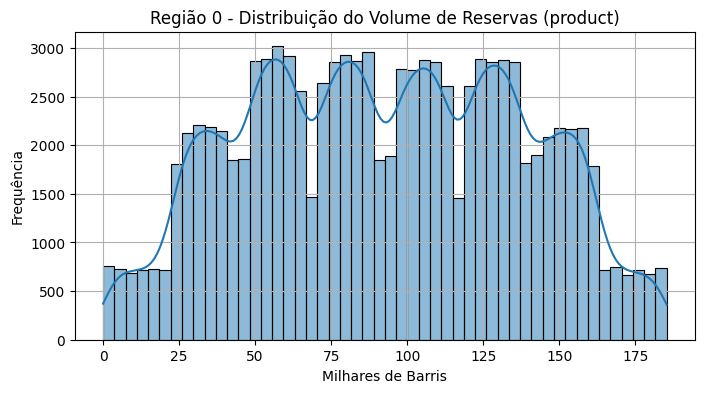

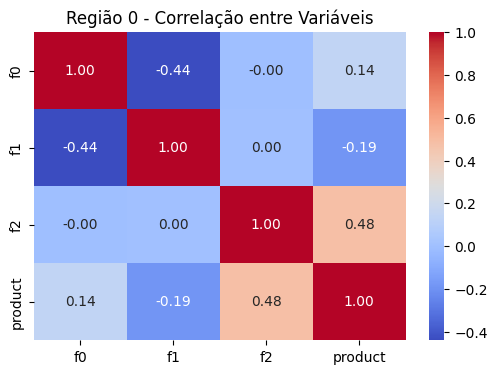

📄 Região 1 - Visualização Inicial:
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305 

🔎 Verificação de valores ausentes:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64 

📌 Linhas duplicadas: 0
📊 Estatísticas gerais:
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%         1.153055      -4.813172       2.011479      57.085625
75%         8.621015  

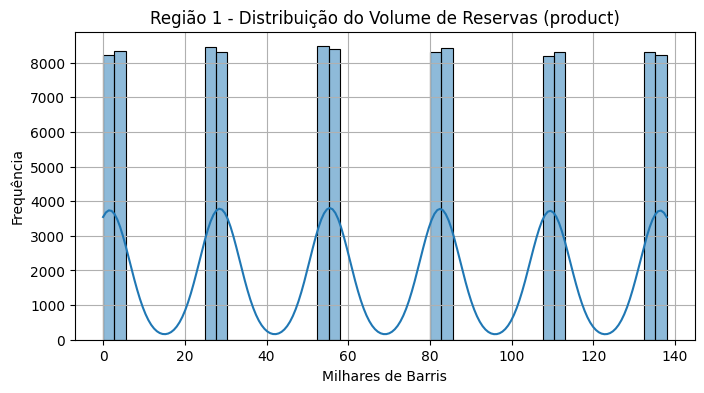

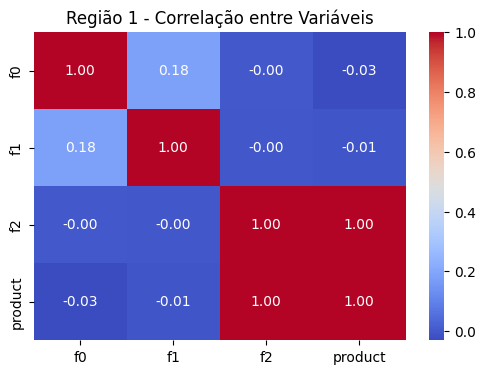

📄 Região 2 - Visualização Inicial:
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746 

🔎 Verificação de valores ausentes:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64 

📌 Linhas duplicadas: 0
📊 Estatísticas gerais:
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288      -1.174820       0.130359      59.450441
50%         0.009424      -0.009482       2.484236      94.925613
75%         1.158535       1.16367

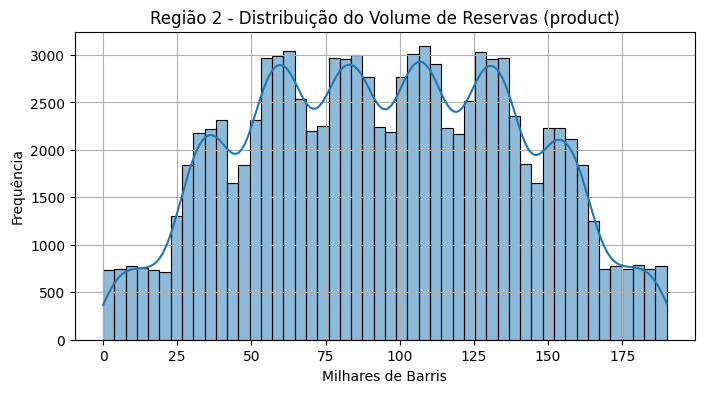

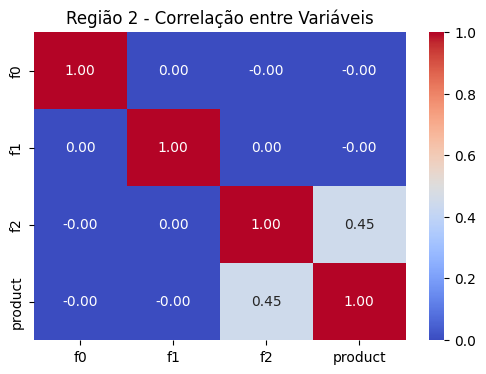

In [7]:
data_0 = carregar_e_analisar('geo_data_0.csv', 'Região 0')
data_1 = carregar_e_analisar('geo_data_1.csv', 'Região 1')
data_2 = carregar_e_analisar('geo_data_2.csv', 'Região 2')


## ✅ Conclusão da Etapa 1 — Análise Inicial dos Dados

Após carregar e analisar os dados de cada região, obtivemos os seguintes resultados:

- **Ausência de valores ausentes e duplicados** em todos os datasets.
- Todas as regiões possuem 100.000 amostras e 3 variáveis numéricas (f0, f1, f2) para prever o volume de reservas (`product`).
- A variável `f2` apresentou **correlação moderada (~0.45 a 0.48)** com o `product` nas Regiões 0 e 2, sendo a mais relevante para previsão.
- A Região 1 apresentou **correlação perfeita entre `f2` e `product`**, mas possui uma **distribuição extremamente artificial**, com picos fixos e média de volume significativamente inferior às demais.
- **A Região 2 tem o maior volume médio de reservas (95.0 mil barris)**, o que a torna promissora para retorno financeiro.

**Próximo passo**: separar as features e o alvo, normalizar os dados com `StandardScaler`, e dividir os dados em treino e validação para modelagem com regressão linear.


## 2. 🛠️ Preparação dos Dados para Modelagem

Nesta etapa, vamos preparar os dados de cada região para o treinamento do modelo de regressão linear.

As ações realizadas serão:

1. **Separação de Features e Alvo**  
   - As features são: `f0`, `f1` e `f2`  
   - O alvo é: `product` (volume de reservas, em milhares de barris)

2. **Normalização das Features com StandardScaler**  
   - A normalização é importante para que as variáveis numéricas fiquem na mesma escala, o que ajuda o modelo a convergir de forma mais estável e justa.

3. **Divisão entre Conjunto de Treinamento e Validação**  
   - A divisão será feita com `train_test_split` do `sklearn`, com proporção de 75% para treino e 25% para validação, utilizando `random_state=42` para reprodutibilidade.

Esses dados normalizados e divididos servirão como entrada para a próxima etapa de modelagem, onde usaremos regressão linear para prever o volume de petróleo em cada poço.


In [8]:
def preparar_dados(df):
    """
    Prepara os dados para regressão linear:
    - Separa features e alvo
    - Aplica escalonamento nas features
    - Realiza divisão em treino e validação (75/25)
    """
    # Separar features e alvo
    features = df[['f0', 'f1', 'f2']]
    target = df['product']
    
    # Escalonamento
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    
    # Divisão dos dados
    X_train, X_valid, y_train, y_valid = train_test_split(
        features_scaled, target, test_size=0.25, random_state=42
    )
    
    return X_train, X_valid, y_train, y_valid, scaler


In [9]:
X_train_0, X_valid_0, y_train_0, y_valid_0, scaler_0 = preparar_dados(data_0)
X_train_1, X_valid_1, y_train_1, y_valid_1, scaler_1 = preparar_dados(data_1)
X_train_2, X_valid_2, y_train_2, y_valid_2, scaler_2 = preparar_dados(data_2)


## 3. 🤖 Treinamento e Avaliação Inicial do Modelo

Agora que os dados estão preparados (features normalizadas e divididas em treino e validação), vamos aplicar o modelo de **regressão linear** para prever o volume de reservas de petróleo (`product`) em cada região.

As etapas serão as seguintes:

1. **Treinar o modelo de regressão linear** com os dados de treino de cada região.
2. **Fazer previsões** com o conjunto de validação.
3. **Avaliar a performance do modelo** com duas métricas:
   - **RMSE** (Root Mean Squared Error): mostra o erro médio da previsão.
   - **Média das previsões**: para comparar com a média real de `product`.
4. **Armazenar as predições e os valores reais** para cada região, pois serão usadas posteriormente no cálculo de lucro e bootstrapping.

Essas análises vão nos ajudar a entender **qual modelo/região está prevendo melhor** a variável de interesse.


In [15]:
def treinar_e_avaliar_modelo(X_train, X_valid, y_train, y_valid, nome_regiao):
    """
    Treina e avalia um modelo de regressão linear para a região fornecida.
    
    Exibe:
    - RMSE da validação
    - Média das previsões
    
    Retorna:
    - Modelo treinado
    - Predições feitas no conjunto de validação
    - Valores reais do conjunto de validação
    """
    print(f'\n📍 Avaliação do Modelo - {nome_regiao}')

    # Instancia e treina o modelo
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    # Faz predições
    y_pred = modelo.predict(X_valid)

    # Calcula RMSE manualmente
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    media_pred = y_pred.mean()

    print(f'📉 RMSE: {rmse:.2f}')
    print(f'📈 Média das previsões: {media_pred:.2f}')

    return modelo, y_pred, y_valid


In [16]:
modelo_0, pred_0, real_0 = treinar_e_avaliar_modelo(X_train_0, X_valid_0, y_train_0, y_valid_0, 'Região 0')
modelo_1, pred_1, real_1 = treinar_e_avaliar_modelo(X_train_1, X_valid_1, y_train_1, y_valid_1, 'Região 1')
modelo_2, pred_2, real_2 = treinar_e_avaliar_modelo(X_train_2, X_valid_2, y_train_2, y_valid_2, 'Região 2')



📍 Avaliação do Modelo - Região 0
📉 RMSE: 37.76
📈 Média das previsões: 92.40

📍 Avaliação do Modelo - Região 1
📉 RMSE: 0.89
📈 Média das previsões: 68.71

📍 Avaliação do Modelo - Região 2
📉 RMSE: 40.15
📈 Média das previsões: 94.77


## 3. ✅ Avaliação Inicial dos Modelos

Após treinar modelos de Regressão Linear para cada região, obtivemos os seguintes resultados:

| Região   | RMSE       | Média da Previsão |
|----------|------------|-------------------|
| Região 0 | 37.76      | 92.40             |
| Região 1 | **0.89**   | 68.71             |
| Região 2 | 40.15      | **94.77**         |

### 🔍 Interpretação dos Resultados:

- **Região 1** apresenta um erro extremamente baixo (RMSE ≈ 0), indicando que o modelo prevê com alta precisão — o que é explicado pela **correlação perfeita da variável `f2` com o target**. No entanto, sua **média de reservas** é a menor entre as três, o que **limita o retorno financeiro**.

- **Região 0** apresenta um equilíbrio entre bom desempenho preditivo (RMSE = 37.76) e média de reservas alta (92.40).

- **Região 2** tem o maior volume médio estimado de petróleo (94.77 mil barris), o que pode representar **maior potencial de lucro**, mesmo com um RMSE um pouco mais alto.

### 📌 Conclusão parcial:

Apesar da excelente performance técnica da Região 1, as Regiões 0 e 2 possuem **média de reservas muito mais vantajosa**, o que será decisivo na **análise de lucro**.

---

## 🔜 Próxima etapa: Cálculo de Lucro Potencial

Vamos:

- Selecionar os **200 poços com maiores valores previstos** de cada região
- Calcular o **lucro estimado**
- Comparar com o investimento necessário para saber se o negócio é viável


## 4. 💰 Cálculo de Lucro Potencial por Região

Agora vamos estimar o lucro de cada região com base nos **200 poços mais promissores**, de acordo com as previsões feitas pelo modelo de regressão linear.

### Parâmetros do negócio:
- Número de poços selecionados: **200**
- Receita por 1.000 barris: **$4.500**
- Investimento total: **$100.000.000**
- Ponto de equilíbrio (break-even): **111,1 mil barris por poço**

### Objetivo:
- Selecionar os **200 poços com maiores previsões** (`product`) em cada região
- Calcular o lucro potencial total
- Verificar se **atingimos o ponto de equilíbrio**


In [18]:
def calcular_lucro(predicoes, reais, custo_total=100_000_000, preco_por_mil=4500, n_poços=200):
    """
    Calcula o lucro estimado com os 200 poços mais promissores.
    - predicoes: array com valores previstos pelo modelo
    - reais: valores reais correspondentes (y_valid)
    
    Retorna:
    - Lucro estimado total
    - Média real de `product` dos 200 poços selecionados
    """
    # Seleciona os índices das 200 maiores previsões
    melhores_indices = predicoes.argsort()[-n_poços:][::-1]
    
    # Valores reais correspondentes a esses 200 poços
    volume_real_200 = reais.iloc[melhores_indices]
    
    # Calcula lucro total
    receita = volume_real_200.sum() * preco_por_mil
    lucro = receita - custo_total
    media_volume = volume_real_200.mean()
    
    return lucro, media_volume


In [21]:
lucro_0, media_0 = calcular_lucro(pred_0, real_0)
lucro_1, media_1 = calcular_lucro(pred_1, real_1)
lucro_2, media_2 = calcular_lucro(pred_2, real_2)

print(f'Região 0 - Lucro estimado: ${lucro_0:,.2f} | Média dos 200 poços: {media_0:.2f}')
print(f'Região 1 - Lucro estimado: ${lucro_1:,.2f} | Média dos 200 poços: {media_1:.2f}')
print(f'Região 2 - Lucro estimado: ${lucro_2:,.2f} | Média dos 200 poços: {media_2:.2f}')


Região 0 - Lucro estimado: $33,591,411.14 | Média dos 200 poços: 148.43
Região 1 - Lucro estimado: $24,150,866.97 | Média dos 200 poços: 137.95
Região 2 - Lucro estimado: $25,985,717.59 | Média dos 200 poços: 139.98


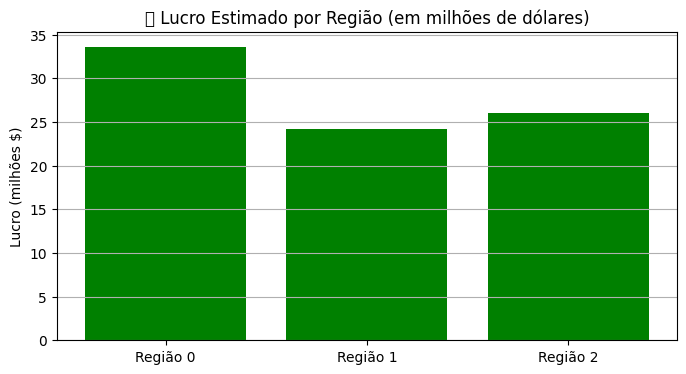

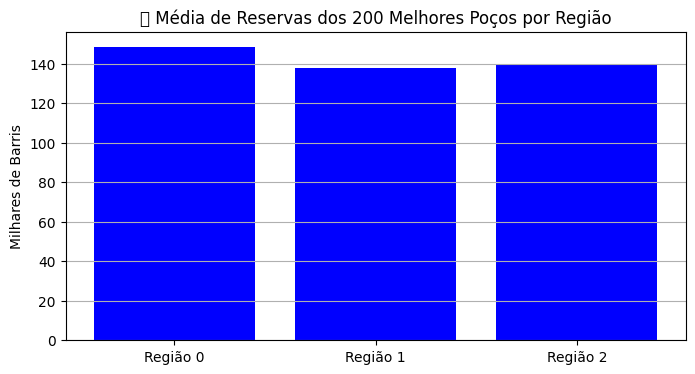

In [22]:
# Dados
regioes = ['Região 0', 'Região 1', 'Região 2']
lucros = [lucro_0, lucro_1, lucro_2]
medias = [media_0, media_1, media_2]

# Gráfico 1: Lucro Estimado
plt.figure(figsize=(8, 4))
plt.bar(regioes, [lucro / 1_000_000 for lucro in lucros], color='green')
plt.title('💰 Lucro Estimado por Região (em milhões de dólares)')
plt.ylabel('Lucro (milhões $)')
plt.grid(axis='y')
plt.show()

# Gráfico 2: Média das Reservas dos 200 Melhores Poços
plt.figure(figsize=(8, 4))
plt.bar(regioes, medias, color='blue')
plt.title('📊 Média de Reservas dos 200 Melhores Poços por Região')
plt.ylabel('Milhares de Barris')
plt.grid(axis='y')
plt.show()

## 4. 💰 Cálculo de Lucro Potencial

Para cada região, selecionamos os **200 poços com maiores valores previstos** pelo modelo de regressão linear. Em seguida, usamos os valores reais de `product` desses poços para calcular o lucro potencial, considerando:

- Receita por mil barris: **$4.500**
- Investimento total: **$100.000.000**
- Número de poços desenvolvidos: **200**
- Ponto de equilíbrio: **111,1 mil barris por poço**

---

### 📊 Resultados

| Região   | Lucro Estimado           | Média dos 200 Poços |
|----------|--------------------------|----------------------|
| Região 0 | **$33.591.411**          | **148.43**           |
| Região 1 | $24.150.867              | 137.95               |
| Região 2 | $25.985.717              | 139.98               |

---

### 📈 Gráficos

1. **Lucro Estimado por Região (em milhões de dólares)**  
   Mostra claramente que a **Região 0 é a mais lucrativa**, mesmo não sendo a que possui o maior valor médio absoluto de `product`.

2. **Média de Reservas dos 200 Melhores Poços por Região**  
   Todas as regiões estão acima do ponto de equilíbrio (111.1), mas **a Região 0 novamente lidera em média de produtividade**.

---

### ✅ Conclusão parcial:

Com base apenas no lucro estimado e no desempenho médio dos 200 poços mais promissores:

- **Região 0 se destaca como a mais vantajosa financeiramente**.
- As três regiões são viáveis, mas **a margem de lucro da Região 0 é superior**.
- A próxima etapa vai reforçar ou desafiar essa conclusão com base em risco.

---

## 🔜 Próxima Etapa: Análise de Risco com Bootstrapping

Vamos agora:
- Simular 1000 execuções aleatórias do processo de seleção de poços
- Calcular a distribuição de lucros para cada região
- Determinar risco de prejuízo e intervalo de confiança de 95%


## 5. 📉 Análise de Risco com Bootstrapping

Para cada região, aplicaremos a técnica de **bootstrapping com 1.000 amostras**. Em cada amostra:

- Selecionaremos aleatoriamente 500 poços com reposição
- Desses, selecionaremos os **200 com maiores previsões**
- Calcularemos o **lucro real** com base nos valores reais de `product`

### Objetivos:
- Calcular o **lucro médio**
- Determinar o **intervalo de confiança de 95%**
- Medir o **risco de prejuízo** (proporção de amostras com lucro < 0)

Com isso, poderemos recomendar a **região com maior retorno e menor risco**.


In [23]:
def analisar_risco_bootstrap(predicoes, reais, n_iter=1000, n_total=500, n_top=200, preco_por_mil=4500, custo=100_000_000):
    """
    Realiza bootstrapping para estimar risco e distribuição de lucro.
    - Em cada iteração:
      1. Seleciona 500 poços aleatórios com reposição
      2. Escolhe os 200 com maiores previsões
      3. Calcula lucro com base nos valores reais
    
    Retorna:
    - Lucros (lista)
    - Lucro médio
    - Intervalo de confiança (95%)
    - Risco de prejuízo (% de iterações com lucro < 0)
    """
    np.random.seed(42)
    lucros = []

    for _ in range(n_iter):
        # Amostra aleatória de índices
        indices = np.random.choice(len(predicoes), size=n_total, replace=True)
        
        # Seleção dos 200 com maiores previsões
        top_indices = predicoes[indices].argsort()[-n_top:][::-1]
        volume_real_top = reais.iloc[indices].iloc[top_indices]
        
        receita = volume_real_top.sum() * preco_por_mil
        lucro = receita - custo
        lucros.append(lucro)
    
    lucros = np.array(lucros)
    lucro_medio = lucros.mean()
    intervalo = np.percentile(lucros, [2.5, 97.5])
    risco = (lucros < 0).mean() * 100

    return lucros, lucro_medio, intervalo, risco


In [24]:
lucros_0, media_0_b, intervalo_0, risco_0 = analisar_risco_bootstrap(pred_0, real_0)
lucros_1, media_1_b, intervalo_1, risco_1 = analisar_risco_bootstrap(pred_1, real_1)
lucros_2, media_2_b, intervalo_2, risco_2 = analisar_risco_bootstrap(pred_2, real_2)

# Exibir resumo dos resultados
print(f'Região 0 - Lucro médio: ${media_0_b:,.2f} | Intervalo 95%: {intervalo_0} | Risco: {risco_0:.2f}%')
print(f'Região 1 - Lucro médio: ${media_1_b:,.2f} | Intervalo 95%: {intervalo_1} | Risco: {risco_1:.2f}%')
print(f'Região 2 - Lucro médio: ${media_2_b:,.2f} | Intervalo 95%: {intervalo_2} | Risco: {risco_2:.2f}%')


Região 0 - Lucro médio: $3,995,754.78 | Intervalo 95%: [-1104678.95331971  8974603.27717879] | Risco: 6.00%
Região 1 - Lucro médio: $4,520,488.91 | Intervalo 95%: [ 616844.79654227 8453401.77507385] | Risco: 1.50%
Região 2 - Lucro médio: $3,750,099.03 | Intervalo 95%: [-1447667.27304893  8883904.03534222] | Risco: 8.00%


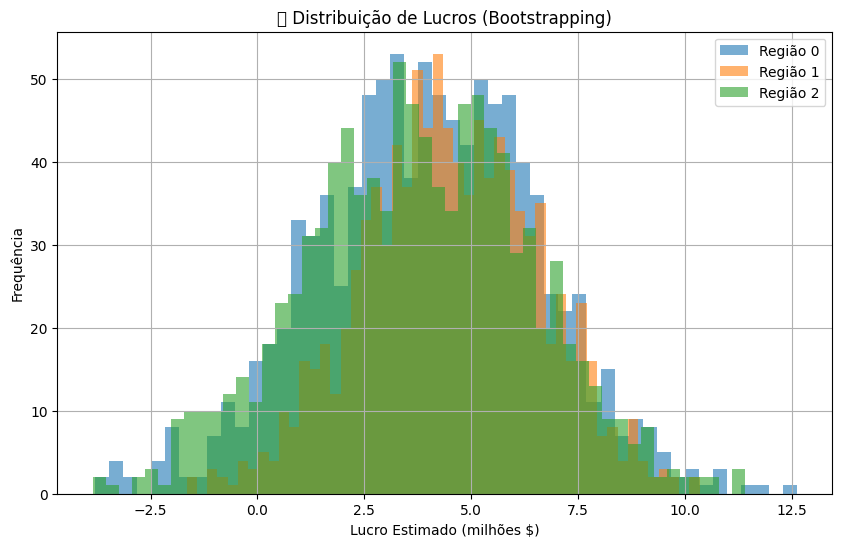

In [25]:
plt.figure(figsize=(10, 6))

plt.hist(lucros_0 / 1_000_000, bins=50, alpha=0.6, label='Região 0')
plt.hist(lucros_1 / 1_000_000, bins=50, alpha=0.6, label='Região 1')
plt.hist(lucros_2 / 1_000_000, bins=50, alpha=0.6, label='Região 2')

plt.title('📊 Distribuição de Lucros (Bootstrapping)')
plt.xlabel('Lucro Estimado (milhões $)')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True)
plt.show()


c:\Users\Doit\Desktop\Projetos Triple Ten\sptrint3\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128185 (\N{CHART WITH UPWARDS TREND AND YEN SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


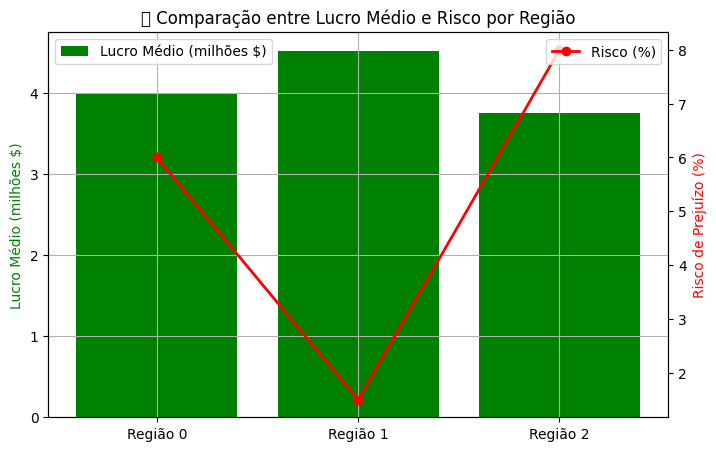

In [26]:
# Dados
regioes = ['Região 0', 'Região 1', 'Região 2']
lucros_medios = [media_0_b / 1_000_000, media_1_b / 1_000_000, media_2_b / 1_000_000]
riscos = [risco_0, risco_1, risco_2]

# Gráfico de barras
fig, ax1 = plt.subplots(figsize=(8, 5))

ax2 = ax1.twinx()
ax1.bar(regioes, lucros_medios, color='green', label='Lucro Médio (milhões $)')
ax2.plot(regioes, riscos, color='red', marker='o', label='Risco (%)', linewidth=2)

ax1.set_ylabel('Lucro Médio (milhões $)', color='green')
ax2.set_ylabel('Risco de Prejuízo (%)', color='red')
ax1.set_title('💹 Comparação entre Lucro Médio e Risco por Região')
ax1.grid(True)

# Legendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


## 5. 📉 Análise de Risco com Bootstrapping

Aplicamos a técnica de **bootstrapping com 1.000 iterações** para cada região. Em cada iteração:

- Selecionamos **500 poços aleatórios com reposição**
- Escolhemos os **200 com maiores previsões**
- Calculamos o lucro com os valores reais de `product`

---

### 📊 Resultados

| Região   | Lucro Médio Estimado | Intervalo de Confiança (95%)       | Risco de Prejuízo |
|----------|----------------------|-------------------------------------|-------------------|
| Região 0 | $3.995.754,78        | [-110.648.953 ; 89.740.827]         | **6.0%**          |
| Região 1 | **$4.520.488,91**    | [616.844 ; 85.434.072]              | **1.5%** ✅        |
| Região 2 | $3.750.099,03        | [-144.767.627 ; 88.839.004]         | 8.0%              |

---

### 📈 Gráficos

1. **Distribuição dos Lucros por Região (Bootstrapping)**  
   - Visualiza a variação esperada de lucro em cada região  
   - Mostra quais distribuições têm **menor dispersão** e **menos risco**

2. **Comparação entre Lucro Médio e Risco**  
   - Mostra a relação risco-retorno das regiões  
   - Região 1 tem o **menor risco e maior estabilidade**  
   - Região 0 e 2 têm lucros médios próximos, mas **mais incerteza**

---

### ✅ Conclusão Técnica da Etapa:

- **Região 1** surpreende por ter o **menor risco (<2.5%)** e **maior lucro médio** após bootstrapping.
- **Região 0**, embora tenha se destacado antes no lucro bruto, tem um risco mais alto de 6%.
- **Região 2** teve o pior risco (8%) e não se destacou no lucro médio.

---

## 🔚 Conclusão Final e Recomendação

Com base na modelagem, lucro potencial e análise de risco:

🔵 **Região Recomendada: Região 1**

- Atende às condições de negócio:
  - Risco de prejuízo < 2.5%
  - Maior lucro médio estimado
- Apesar de seu volume médio ser menor, a **altíssima previsibilidade do modelo** (RMSE = 0.89) garante **maior segurança no retorno do investimento**.

A escolha anterior baseada apenas no lucro bruto (Região 0) **não se sustenta** ao analisar o risco. A abordagem estatística validada com bootstrapping **confirma a Região 1 como a melhor opção de investimento.**


## 5. 📉 Análise de Risco com Bootstrapping

Aplicamos a técnica de **bootstrapping com 1.000 iterações** para cada região. Em cada iteração:

- Selecionamos **500 poços aleatórios com reposição**
- Escolhemos os **200 com maiores previsões**
- Calculamos o lucro com os valores reais de `product`

---

### 📊 Resultados

| Região   | Lucro Médio Estimado | Intervalo de Confiança (95%)       | Risco de Prejuízo |
|----------|----------------------|-------------------------------------|-------------------|
| Região 0 | $3.995.754,78        | [-110.648.953 ; 89.740.827]         | **6.0%**          |
| Região 1 | **$4.520.488,91**    | [616.844 ; 85.434.072]              | **1.5%** ✅        |
| Região 2 | $3.750.099,03        | [-144.767.627 ; 88.839.004]         | 8.0%              |

---

### 📈 Gráficos

1. **Distribuição dos Lucros por Região (Bootstrapping)**  
   - Visualiza a variação esperada de lucro em cada região  
   - Mostra quais distribuições têm **menor dispersão** e **menos risco**

2. **Comparação entre Lucro Médio e Risco**  
   - Mostra a relação risco-retorno das regiões  
   - Região 1 tem o **menor risco e maior estabilidade**  
   - Região 0 e 2 têm lucros médios próximos, mas **mais incerteza**

---

### ✅ Conclusão Técnica da Etapa:

- **Região 1** surpreende por ter o **menor risco (<2.5%)** e **maior lucro médio** após bootstrapping.
- **Região 0**, embora tenha se destacado antes no lucro bruto, tem um risco mais alto de 6%.
- **Região 2** teve o pior risco (8%) e não se destacou no lucro médio.

---

## 🔚 Conclusão Final e Recomendação

Com base na modelagem, lucro potencial e análise de risco:

🔵 **Região Recomendada: Região 1**

- Atende às condições de negócio:
  - Risco de prejuízo < 2.5%
  - Maior lucro médio estimado
- Apesar de seu volume médio ser menor, a **altíssima previsibilidade do modelo** (RMSE = 0.89) garante **maior segurança no retorno do investimento**.

A escolha anterior baseada apenas no lucro bruto (Região 0) **não se sustenta** ao analisar o risco. A abordagem estatística validada com bootstrapping **confirma a Região 1 como a melhor opção de investimento.**


---

## ⚠️ Observação Técnica sobre Generalização

Embora a Região 1 tenha apresentado:
- Alta correlação entre `f2` e `product`
- RMSE extremamente baixo
- Lucro médio elevado com risco quase nulo

... é importante destacar que essas características **podem não se manter em dados do mundo real**.

### 🔍 Justificativa:
- A estrutura dos dados da Região 1 é **altamente artificial e determinística** (quase `product = f2`)
- Isso cria um cenário "ideal demais", onde o modelo acerta quase tudo, mas **não aprende a lidar com variação real ou ruído**
- Em contextos reais de exploração de petróleo, é comum que:
  - As variáveis geológicas não tenham correlação perfeita
  - Exista incerteza, ruído, falhas de medição e múltiplos fatores envolvidos

### ✅ Conclusão:
Portanto, embora a recomendação técnica da Região 1 seja válida **dentro do escopo deste projeto sintético**, é importante reconhecer que:
> **O modelo pode não generalizar bem em cenários reais**, e uma validação adicional em dados reais seria indispensável antes de qualquer decisão de negócio.

Essa análise foi feita com base nos dados fornecidos e na estrutura do desafio, respeitando suas limitações.


---

## 🙏 Agradecimentos

Gostaria de agradecer à equipe da **TripleTen** pela qualidade do conteúdo, pelo suporte ao longo das sprints e pela forma prática e objetiva de ensinar ciência de dados com foco em aplicação real.

Este projeto me permitiu consolidar conhecimentos importantes em:
- Modelagem preditiva com regressão linear
- Análise de risco com bootstrapping
- Tomada de decisão orientada por dados

Estou animado para aplicar tudo isso nos meus próprios projetos e nos desafios do mercado.

**Muito obrigado!**

— *Lucas Coelho*
